# Import Libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [4]:
#Reading the Dataset
xls = pd.ExcelFile('HospitalDatabase .xlsx')
#Reading the ReAdmissionRegistry sheet
df_RR = pd.read_excel(xls, 'ReAdmissionRegistry')
#Reading the Patients sheet
df_PA = pd.read_excel(xls, 'Patients')
#Reading the EDVisits sheet
df_EDV= pd.read_excel(xls, 'EDVisits')
#Reading the AmbulatoryVisits sheet
df_AV = pd.read_excel(xls, 'AmbulatoryVisits')
#Reading the Discharges sheet
df_D = pd.read_excel(xls, 'Discharges')
#Reading the Providers sheet
df_P= pd.read_excel(xls, 'Providers')
#Reading the EDUnique sheet
df_EDU = pd.read_excel(xls, 'EDUnique')


# 12 Connect to sql and write a query to get list of Provider names whose Providername is starting with letter T.  (Attach screenshots for this question)

In [3]:
from pandasql import sqldf 
import pandasql as ps
mysql = lambda q: sqldf(q, globals() )
df_Tnames  = ps.sqldf("select ProviderName from df_P where ProviderName like 'T%'")
print(df_Tnames)

   ProviderName
0     Ted Texas
1     Ted Green
2     Ted Black
3  Tyler Conner
4    Tony Creed
5     Trent Tye


# 8 Create a bar chart between expectedLOS & Primary diagnosis.

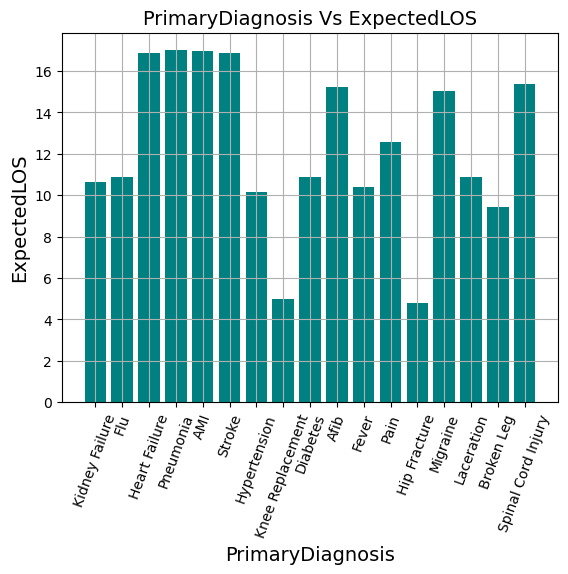

In [4]:
plt.bar(df_RR['PrimaryDiagnosis'], height=df_RR['ExpectedLOS'], color='teal')
plt.title('PrimaryDiagnosis Vs ExpectedLOS', fontsize=14)
plt.xlabel('PrimaryDiagnosis', fontsize=14)
plt.ylabel('ExpectedLOS', fontsize=14)
plt.grid(True)
plt.xticks(rotation=70)
plt.show()

# 64 Using numpy functions, multiply the following arrays
a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)

In [5]:
a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)
print(np.matmul(a,b))

[[10 13]
 [28 40]]


# 36 Create a correlation matrix on EDVisits.

In [6]:
corr_matrix = df_EDV.corr()
print(corr_matrix)

           EDVisitID  PatientID    Acuity
EDVisitID   1.000000   0.975477  0.005813
PatientID   0.975477   1.000000  0.003545
Acuity      0.005813   0.003545  1.000000


# 56 Count of canceled status.

In [7]:
#Reading the Patients sheet
df_AV['VisitStatus'].value_counts()['Canceled']

60

# 4 Display data by splitting age in 4 quartiles and labeling the quartiles.

In [5]:
from datetime import date
today = date.today()
df_PA['year'] = df_PA["DateOfBirth"].dt.year #extracting year from DateOfbirth 
df_age=today.year-df_PA['year']
df_age.sort_values()
print("Q1 quantile of AGE : ", np.quantile(df_age, .25, interpolation='midpoint'))
print("Q2 quantile of AGE : ", np.quantile(df_age, .50, interpolation='midpoint'))
print("Q3 quantile of AGE : ", np.quantile(df_age, .75, interpolation='midpoint'))
print("Q4 quantile of AGE : ", np.quantile(df_age, 1.00, interpolation='midpoint'))

Q1 quantile of AGE :  43.0
Q2 quantile of AGE :  50.0
Q3 quantile of AGE :  57.0
Q4 quantile of AGE :  63.0


# 52 Retrieve the row with minimum DBP using sorting technique.

In [6]:
df_AV_NEW=df_AV.sort_values(by=['BloodPressureDiastolic'])
df_AV_NEW.head(1)

VisitID  PatientMRN  ProviderID DateofVisit           DateScheduled  \
757      163         801          11  2019-02-08 2019-02-07 23:41:12.181   

     VisitDepartmentID  VisitType  BloodPressureSystolic  \
757                  7  Follow Up                  120.0   

     BloodPressureDiastolic      Pulse VisitStatus  
757               51.695653  53.310495   Completed

# 32 If patient's gender is Female, add Ms.to the name and for male patients add Mr. to the name

In [7]:
#df_PA['Name'] = 'Mr ' + df_PA['FirstName'] + ' ' + df_PA['LastName']
df_Mname=df_PA[df_PA['Gender']=='Male']
df_Fname=df_PA[df_PA['Gender']=='Female']
print('Mr ' + df_Mname.FirstName + ' ' + df_Mname.LastName )
print('Ms ' + df_Fname.FirstName + ' ' + df_Fname.LastName )


0             Mr Lanni Sue
1             Mr Far Myers
2       Mr Devlin  Michael
3         Mr Carmine Texas
4            Mr Tann  Bama
              ...         
940         Mr Wat Fideler
941     Mr Wandie Baythrop
942     Mr Diahann Smeeton
943    Mr Panchito Sharple
944        Mr Walsh Calvie
Length: 537, dtype: object
25           Ms Sally Bing
26            Ms Mike Bing
27          Ms Jordan Ross
28            Ms Ted Scott
29          Ms Ala Halpert
              ...         
914      Ms Jerrilyn Dyson
915      Ms Kaylil Baldack
916     Ms Velvet Bushnell
917          Ms Kiri Allom
918    Ms Champlin Bulford
Length: 408, dtype: object


# 28 Which reason of visit has maximum mortality rate.


In [8]:
##RR EDV
df_RR_EDV = df_RR[["PatientID","ExpectedMortality"]].merge(df_EDV[["PatientID","ReasonForVisit"]],
                                                          on = "PatientID")
df_RR_EDV_New=max(df_RR_EDV['ExpectedMortality'])
df_pat=df_RR_EDV[df_RR_EDV['ExpectedMortality']==df_RR_EDV_New]
print(df_pat)

     PatientID  ExpectedMortality ReasonForVisit
816        572           0.989945      Pneumonia


# 20 Count of number of patients admitted based on Primary Diagnosis and Service provided.


In [9]:
print(df_RR.groupby(['Service', 'PrimaryDiagnosis']).size().reset_index(name='Patient_Count'))

             Service    PrimaryDiagnosis  Patient_Count
0         Cardiology                 AMI             40
1         Cardiology                Afib             10
2         Cardiology          Broken Leg              3
3         Cardiology                 Flu              2
4         Cardiology       Heart Failure             39
5         Cardiology      Kidney Failure              1
6   General Medicine          Broken Leg              3
7   General Medicine            Diabetes             38
8   General Medicine               Fever             13
9   General Medicine                 Flu             54
10  General Medicine        Hypertension             35
11  General Medicine      Kidney Failure             12
12  General Medicine          Laceration             21
13  General Medicine           Pneumonia             67
14  General Medicine              Stroke             20
15       Hospitalist                 AMI              1
16       Hospitalist          Broken Leg        

# 16 Plot a graph to show the distribution of expected length of stay.


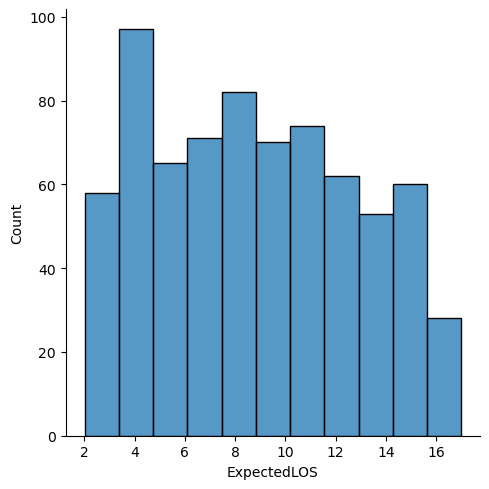

In [10]:
import seaborn as sns
%matplotlib inline
sns.displot(df_RR['ExpectedLOS'])

# 80 Write a code snippet to print different ProviderSpecialty ( use groupby and get the list of the groups).

In [11]:
df_P.groupby(["ProviderSpecialty"]).first()
grouped_obj = df_P.groupby(["ProviderSpecialty"])
for key, item in grouped_obj:
    print("Key is: " + str(key))
    print(str(item), "\n\n")

Key is: Cardiology
    ProviderID   ProviderName ProviderSpecialty     ProviderDateOnStaff
16          17   Kent Kendall        Cardiology 2001-12-22 11:18:32.919
17          18     Ryan Kevin        Cardiology 2003-01-14 21:16:34.778
18          19   Tyler Conner        Cardiology 2003-07-09 02:41:40.410
19          20  Bailey Barret        Cardiology 2003-08-20 16:05:50.179
20          21    Megan Bonco        Cardiology 2004-02-17 21:22:30.546
21          22  Joesph Walter        Cardiology 2005-02-04 11:40:44.121
22          23    Walter King        Cardiology 2006-03-12 22:11:58.070
23          24      Luke Long        Cardiology 2006-04-28 00:16:36.762 


Key is: Pediatrics
   ProviderID    ProviderName ProviderSpecialty     ProviderDateOnStaff
0           1       Sally Sue        Pediatrics 1993-01-01 00:00:00.000
1           2      Mike Myers        Pediatrics 1993-05-02 00:00:17.695
2           3  Jordan Michael        Pediatrics 1993-06-24 21:31:46.687
3           4       Ted

# 56 Count of canceled status.

In [12]:
df_AV['VisitStatus'].value_counts()['Canceled']

60

# 76 Find the last name of the patients, by getting the first name from the user.


In [47]:
fName=input('What is the First name of the patient? :')
New_df_PA=df_PA[df_PA['FirstName']==fName]
print(New_df_PA.FirstName + ' ' + New_df_PA.LastName)
if New_df_PA.empty:
    print ('Patient does not exist')

What is the First name of the patient? :Far
1        Far Myers
15      Far Pardon
95    Far Rudinger
dtype: object


# 60 Find the list of patients whose ExpectedLOS is greater than the value given by the user.

In [46]:
df_RR_PA = df_RR[["PatientID","ExpectedLOS"]].merge(df_PA[["PatientID","FirstName","LastName"]],
                                                          on = "PatientID")
df_elos=float(input('Please enter the Expected Los  :'))
New_df_PA=df_RR_PA[df_RR_PA['ExpectedLOS']>df_elos]
print(New_df_PA)
if New_df_PA.empty:
    print ('No Patient satifies')

Please enter the Expected Los  :16
     PatientID  ExpectedLOS  FirstName     LastName
6            8    16.472257  Alexandra        Green
95          90    16.161806      Cilka        Alden
100         95    16.838918       Abey   Philipsson
140        134    16.225126      Borer   Stonehewer
217        215    16.998213     Whitby        Group
263        259    16.306983     Mayert  MacGettigen
308        302    16.189186     Johann          LLC
344        338    16.753521    Scottie  Phetteplace
357        351    16.784042       Derk      Garbutt
358        352    16.989907     Evanne     Woodford
361        355    16.154370    Vitoria      Cleaton
371        365    16.032985   Johannes       O'Daly
421        438    16.974824      Daryl     Buttriss
473        490    16.851937      Angel     Brandone
479        496    16.655430     Lilyan     Alekseev
542        560    16.785926      Robyn     Aucourte
568        587    16.122515  Johnathan        Philo
578        597    16.456266  

# 40 Plot a graph showing the count of patients for the reason visited the hospital.

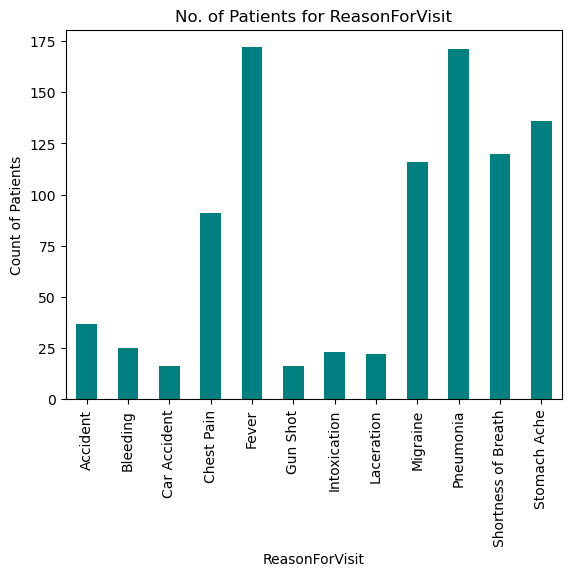

In [16]:
df_EDU.groupby(["ReasonForVisit"])["PatientID"].count().plot(kind='bar',color = 'teal',ylabel='Count of Patients',xlabel='ReasonForVisit',title='No. of Patients for ReasonForVisit')
plt.show()

# 44 Create a pivot table displaying average LOS based on Service and Primary Diagnosis.


In [17]:
pd.pivot_table(data=df_D, index=["Service","PrimaryDiagnosis"], values='ExpectedLOS', aggfunc='mean')

ExpectedLOS
Service          PrimaryDiagnosis               
Cardiology       AMI                   12.414202
                 Afib                  13.162920
                 Broken Leg             3.911826
                 Flu                    3.970428
                 Heart Failure         13.014044
                 Kidney Failure         6.580273
General Medicine Broken Leg             3.368132
                 Diabetes               5.665298
                 Fever                  6.803796
                 Flu                    6.141753
                 Hypertension           5.369365
                 Kidney Failure         5.943163
                 Laceration             6.771154
                 Pneumonia              6.140270
                 Stroke                 7.173333
Hospitalist      AMI                   13.828290
                 Broken Leg             7.125069
                 Diabetes               7.874359
                 Fever                  8.865651
                 Flu                    7.033979
                 Hypertension           7.864913
                 Kidney Failure         7.850346
                 Knee Replacement       2.255705
                 Laceration             7.069360
                 Pneumonia              8.146240
                 Stroke                15.349671
ICU              AMI                   12.503213
                 Afib                   9.651522
                 Fever                  3.860693
                 Flu                    4.953871
                 Heart Failure         12.784620
                 Hypertension           5.092533
                 Kidney Failure         9.045995
                 Laceration            10.101443
                 Pneumonia             13.523626
                 Spinal Cord Injury    15.276540
                 Stroke                13.297978
Neurology        AMI                   10.482847
                 Flu                    6.700593
                 Heart Failure         12.737565
                 Hypertension           4.276454
                 Migraine              12.202213
                 Pain                  11.441453
                 Pneumonia              7.527330
                 Stroke                12.745608
Orthopeadics     Hip Fracture           3.474971
                 Knee Replacement       3.702839

# 68 Display the data where actual LOS is greater than expected LOS.

In [18]:
df_D_PA = df_D[["PatientID","AdmissionID","AdmissionDate","DischargeDate","PrimaryDiagnosis","ExpectedLOS"]].merge(df_PA[["PatientID","FirstName","LastName"]],
                                                          on = "PatientID")
df_ActualLOS=(df_D_PA["DischargeDate"]-df_D_PA["AdmissionDate"]).dt.days
New_df_D_PA=df_D_PA[df_D_PA['ExpectedLOS']<df_ActualLOS]
New_df_D_PA

PatientID  AdmissionID AdmissionDate           DischargeDate  \
1           93          257    2018-01-06 2018-01-18 02:59:04.667   
4          103          258    2018-01-07 2018-01-15 13:32:36.157   
5          109          395    2018-01-07 2018-01-22 17:57:37.103   
6          115          396    2018-01-08 2018-01-17 02:19:05.623   
8          116          259    2018-01-08 2018-01-20 03:40:53.605   
..         ...          ...           ...                     ...   
712        703          703    2018-02-21 2018-02-27 08:53:38.211   
713        708          709    2018-02-21 2018-03-01 05:59:22.116   
714        713          697    2018-02-21 2018-03-04 00:23:19.967   
715        716          715    2018-02-21 2018-03-06 03:31:05.262   
719        742          710    2018-02-22 2018-03-10 20:38:30.568   

    PrimaryDiagnosis  ExpectedLOS   FirstName  LastName  
1         Broken Leg     6.816558      Lucila     Eyers  
4         Broken Leg     2.639297      Jethro    Wharin  
5                Flu     2.981758  Christiano    Bonhan  
6                Flu     4.959098      Zonnya  Frankton  
8         Broken Leg     2.279624     Gerhold       Inc  
..               ...          ...         ...       ...  
712        Pneumonia     3.539165      Stokes  Wadeling  
713         Diabetes     4.518876      Russel    Dudley  
714        Pneumonia     8.542970  Konopelski       LLC  
715    Heart Failure    11.362095      Lavena    Tidman  
719         Diabetes     7.195441    Ondricka    Hegley  

[397 rows x 8 columns]

# 48 Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy).

In [19]:
pd.pivot_table(data=df_D, index=["Service","DischargeDisposition"], values='ExpectedLOS', aggfunc='mean')

ExpectedLOS
Service          DischargeDisposition             
Cardiology       Expired                  9.202626
                 Home                    12.864936
                 Transfer                11.818403
General Medicine Expired                  5.874003
                 Home                     6.105696
                 Transfer                 6.116124
Hospitalist      Expired                  6.775636
                 Home                     8.009046
                 Transfer                 5.701389
ICU              Expired                  9.919063
                 Home                    13.451158
                 Transfer                11.989238
Neurology        Expired                  9.384312
                 Home                    12.538859
                 Transfer                11.469198
Orthopeadics     Expired                  3.943883
                 Home                     3.508337
                 Transfer                 4.842255

# 24 Get the number of patients based on ReasonForVisit and EDDisposition [unstack functions].

In [21]:
df_ST=df_EDU.groupby(["ReasonForVisit","EDDisposition"])["PatientID"].count()
df_ST.unstack(1)

EDDisposition        Admitted  Discharged  admitted  discharged
ReasonForVisit                                                 
Accident                  NaN         NaN      37.0         NaN
Bleeding                 14.0        11.0       NaN         NaN
Car Accident             15.0         NaN       1.0         NaN
Chest Pain               66.0         NaN      14.0        11.0
Fever                     NaN        88.0      40.0        44.0
Gun Shot                  NaN         NaN      16.0         NaN
Intoxication              NaN         NaN       NaN        23.0
Laceration                NaN        22.0       NaN         NaN
Migraine                 26.0        31.0      15.0        44.0
Pneumonia                52.0         9.0      70.0        40.0
Shortness of Breath       NaN        12.0      65.0        43.0
Stomach Ache             29.0        32.0       NaN        75.0

# 24 Get the number of patients based on ReasonForVisit and EDDisposition [used stack functions].

In [22]:
df=pd.pivot_table(data=df_EDU, index=["ReasonForVisit","EDDisposition"], values='PatientID', aggfunc='count')
print("Stacked DataFrame:\n", df.stack())

Stacked DataFrame:
 ReasonForVisit       EDDisposition           
Accident             admitted       PatientID    37
Bleeding             Admitted       PatientID    14
                     Discharged     PatientID    11
Car Accident         Admitted       PatientID    15
                     admitted       PatientID     1
Chest Pain           Admitted       PatientID    66
                     admitted       PatientID    14
                     discharged     PatientID    11
Fever                Discharged     PatientID    88
                     admitted       PatientID    40
                     discharged     PatientID    44
Gun Shot             admitted       PatientID    16
Intoxication         discharged     PatientID    23
Laceration           Discharged     PatientID    22
Migraine             Admitted       PatientID    26
                     Discharged     PatientID    31
                     admitted       PatientID    15
                     discharged     PatientID    4

# 72 List male patients over the age of 60 who have undergone surgery from January-March 2019.

In [23]:
from datetime import date
df_PA_AV = pd.merge(df_PA, df_AV, left_on=['PatientID'], right_on = ['PatientMRN'])
df_PA_AV_P = pd.merge(df_PA_AV, df_P, left_on=['ProviderID'], right_on = ['ProviderID'])
df_All = df_PA_AV_P[["PatientID","FirstName","LastName","DateOfBirth","Gender","ProviderID","ProviderName","ProviderSpecialty","ProviderDateOnStaff"]]
df_All[(df_All['Gender']=="Male") 
           & (date.today().year-df_All["DateOfBirth"].dt.year>60) 
           & (df_All["ProviderSpecialty"]=="Surgery")
           & (df_All["ProviderDateOnStaff"].dt.year==2019)
           & (df_All["ProviderDateOnStaff"].dt.month.between(1,3))]

##No data in the dataset for the mentioned window
 

Empty DataFrame
Columns: [PatientID, FirstName, LastName, DateOfBirth, Gender, ProviderID, ProviderName, ProviderSpecialty, ProviderDateOnStaff]
Index: []

##No data in the dataset for the mentioned window